In [ ]:
#1)online_shoppers_intention --> Decission tree, Gradient Boosting and SVM
#2)tripadvisor_review --> Naive bayes
#3)

In [ ]:
'''
Performance Summary:
                        Accuracy Precision    Recall  F1 Score   ROC AUC
Decision Tree           0.850365  0.515815  0.554974  0.534678  0.729742
Gradient Boosting       0.900649  0.721683   0.58377  0.645441  0.925861
Support Vector Machine  0.884023  0.706897  0.429319  0.534202  0.849753
'''

Dataset shape: (12330, 18)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non

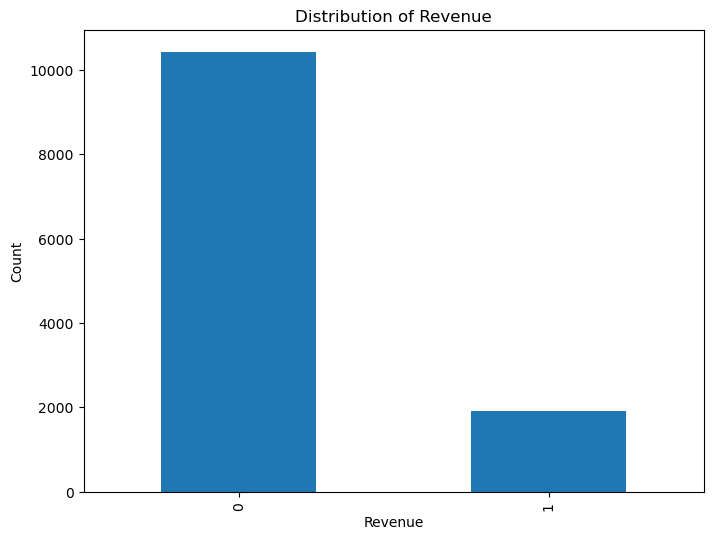

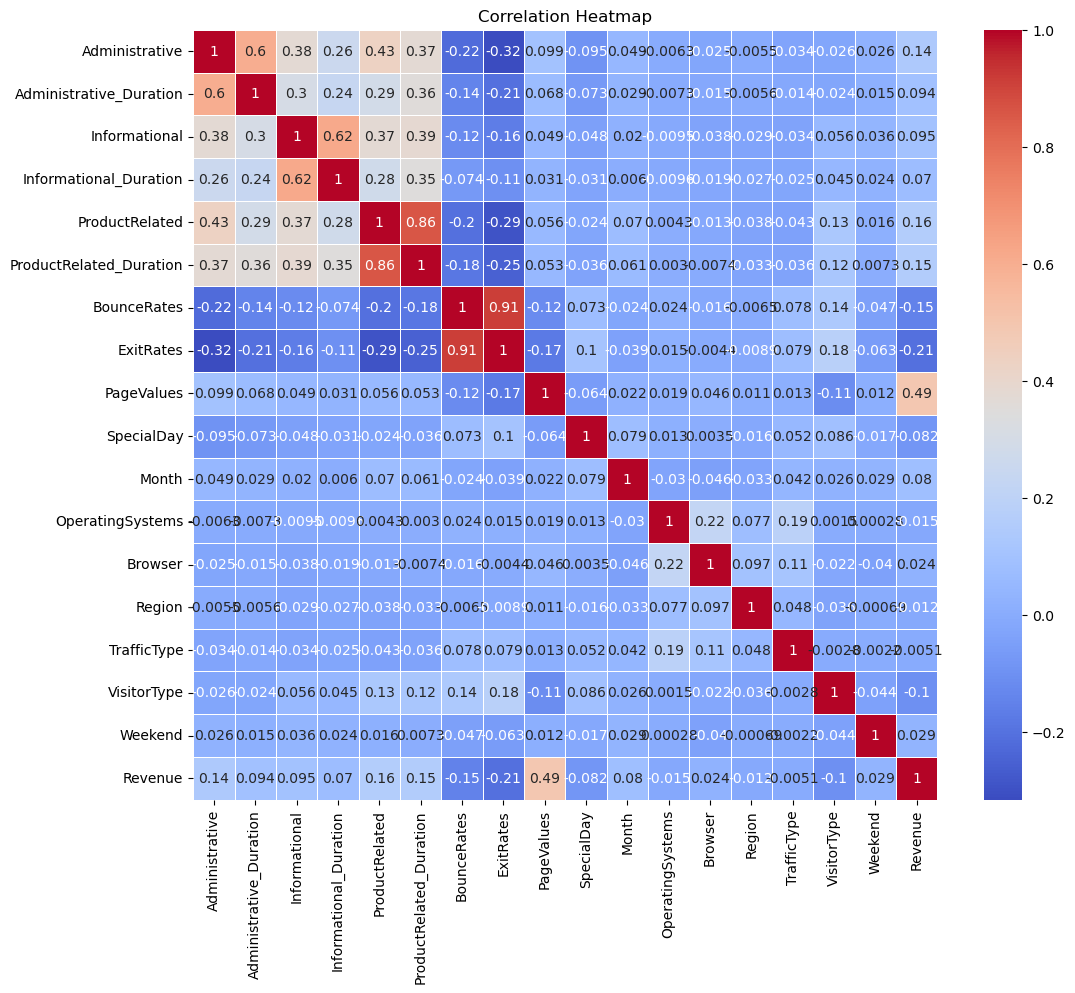

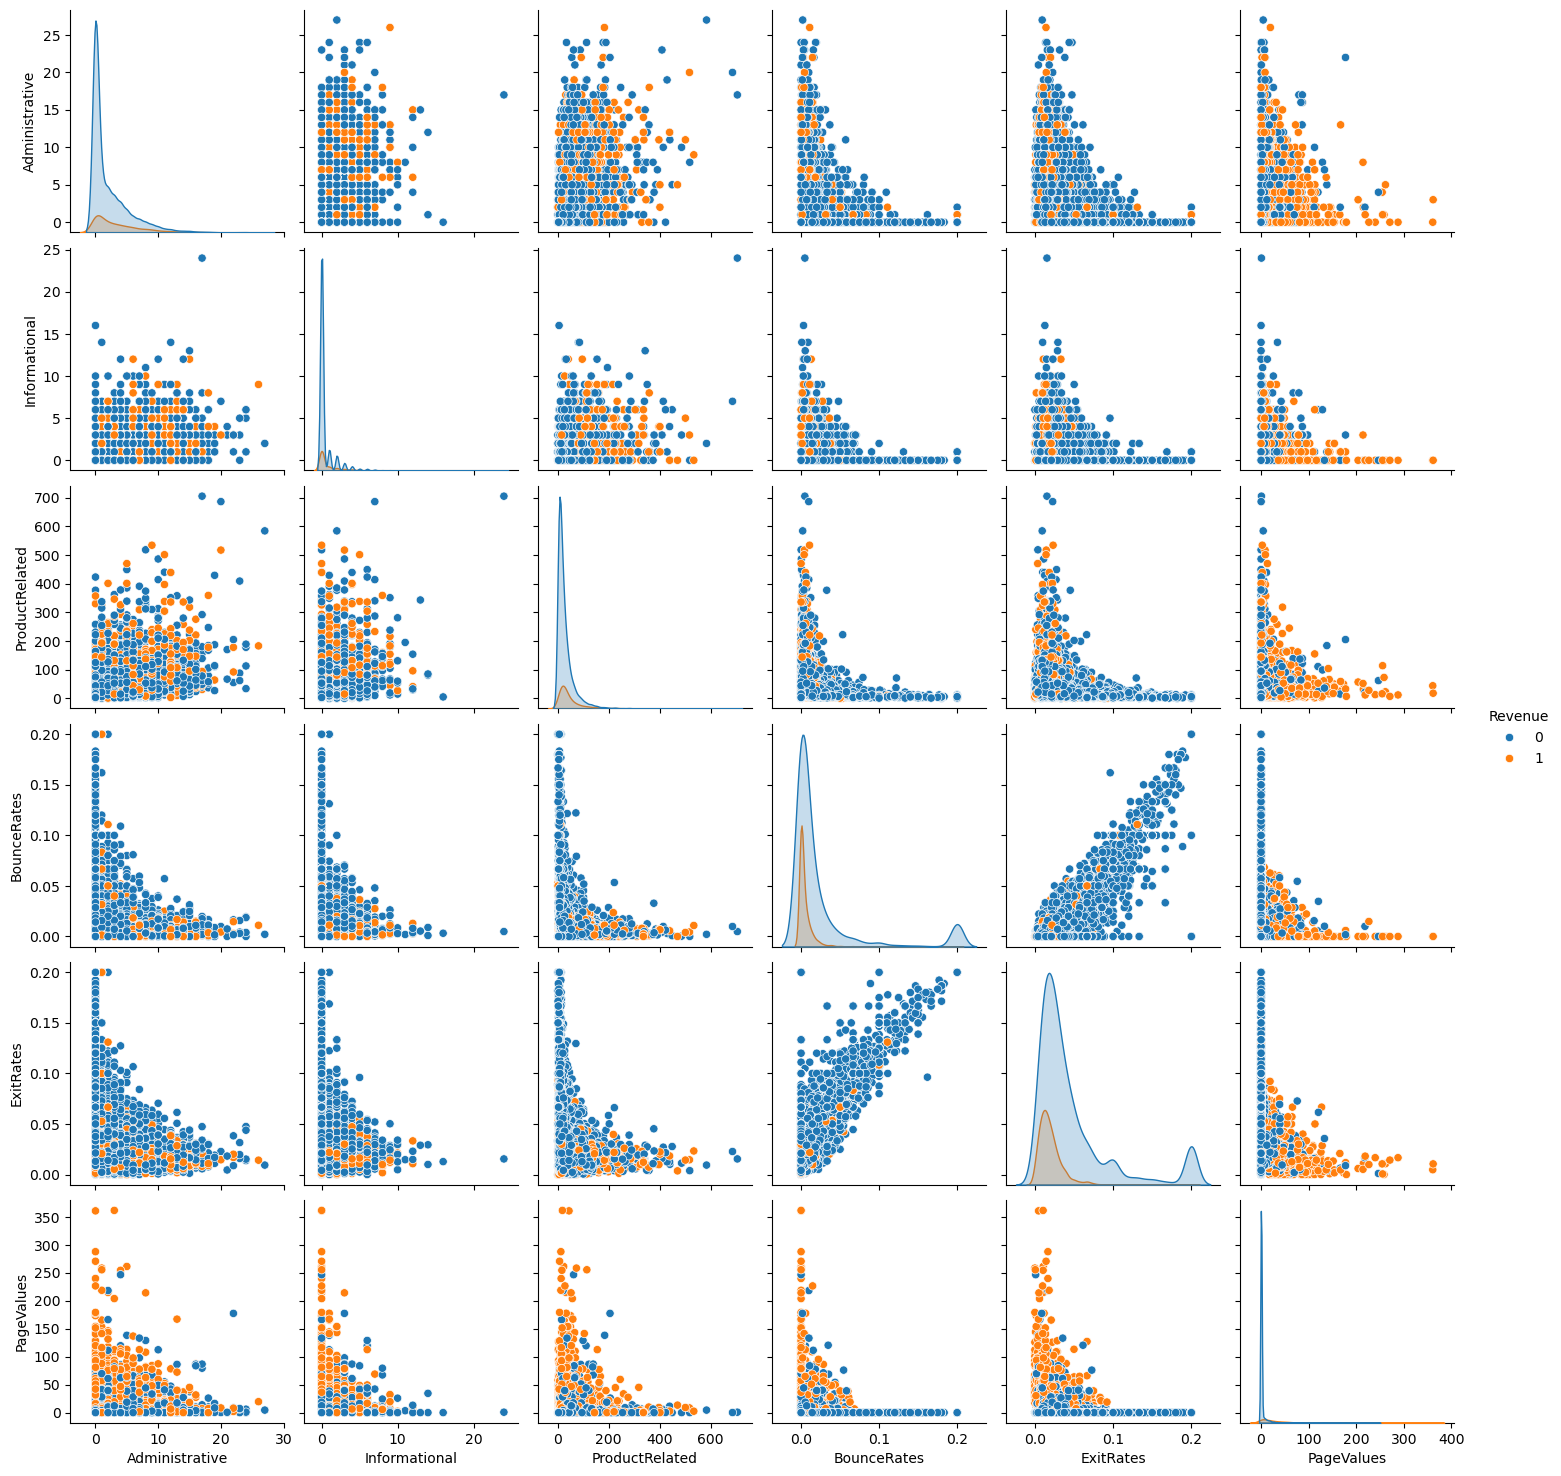


Preprocessed dataset:
   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821 -1.334959         -1.233426   
1    -0.457683   1.171473  

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("C:\\Users\\hp\\Downloads\\online_shoppers_intention.csv")

# Explore the dataset structure
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()
print("\nDataset description:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Handle categorical variables using Label Encoding
le = LabelEncoder()
categorical_columns = ['Month', 'VisitorType', 'Weekend', 'Revenue']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Analyze the distribution of the target variable (Revenue)
plt.figure(figsize=(8, 6))
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

# Select only numeric columns for correlation heatmap
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Visualize relationships between features using correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualize relationships between features using pair plot
sns.pairplot(df, hue='Revenue', vars=['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues'])
plt.show()

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows of the preprocessed dataset
print("\nPreprocessed dataset:")
print(df.head())

In [9]:
df['Revenue'] = df['Revenue'].astype(int)


In [11]:
print(df['Revenue'].value_counts())


Revenue
0    10422
2     1908
Name: count, dtype: int64


In [13]:
df['Revenue'] = (df['Revenue'] > 0).astype(int)


In [15]:
print(df['Revenue'].value_counts())


Revenue
0    10422
1     1908
Name: count, dtype: int64


C:\Users\hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                     Accuracy Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.883212  0.764045  0.356021  0.485714  0.667934
Random Forest        0.901054  0.734694  0.565445  0.639053  0.764009
XGBoost              0.896188  0.700637  0.575916  0.632184  0.765405


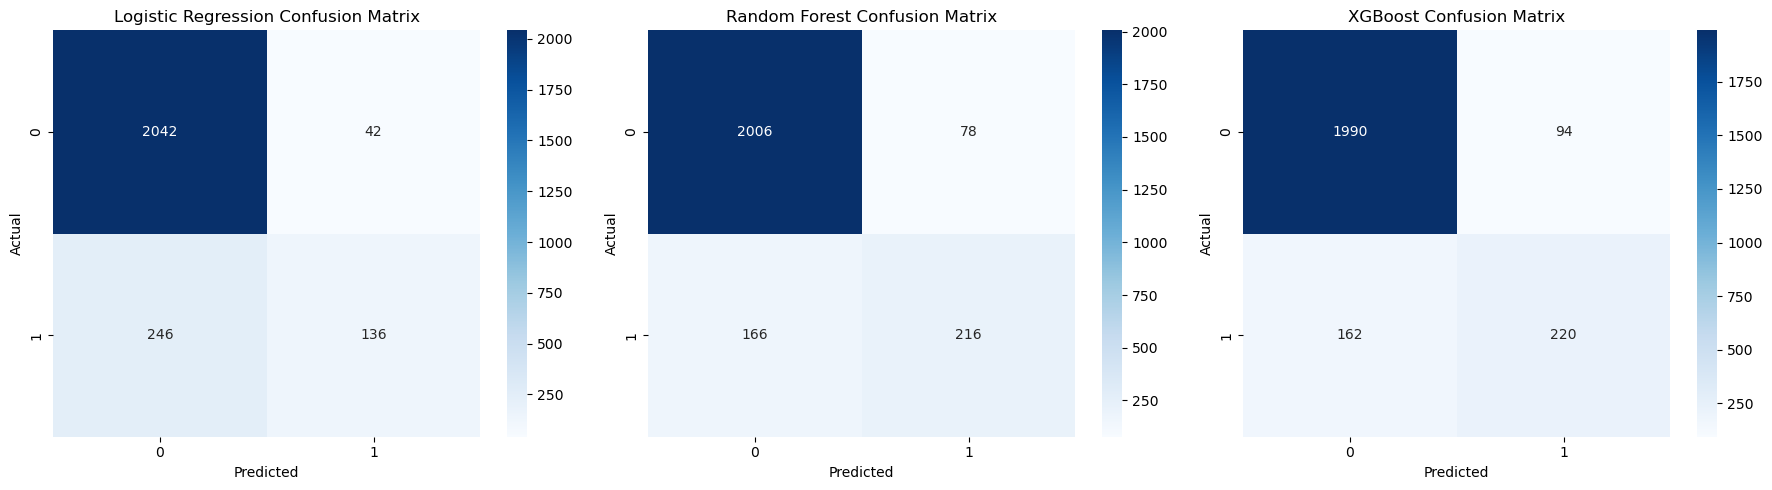

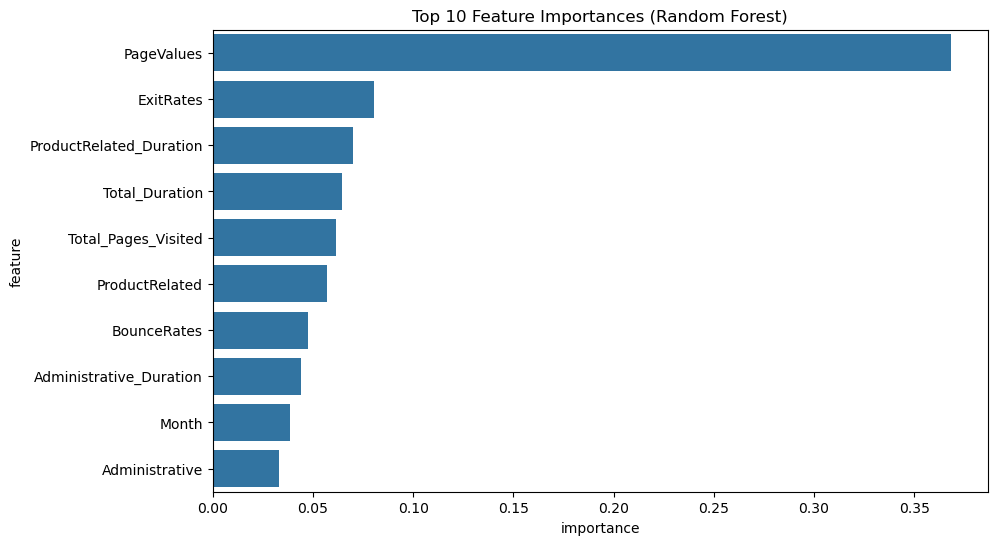

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Convert categorical variables to numerical
le = LabelEncoder()
categorical_columns = ['Month', 'VisitorType', 'Weekend']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature Engineering
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Pages_Visited'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

# Prepare features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']])

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance for Random Forest
rf_importance = pd.DataFrame({'feature': X.columns, 'importance': models['Random Forest'].feature_importances_})
rf_importance = rf_importance.sort_values('importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=rf_importance)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()



Performance Summary:
                        Accuracy Precision    Recall  F1 Score   ROC AUC
Decision Tree           0.850365  0.515815  0.554974  0.534678  0.729742
Gradient Boosting       0.900649  0.721683   0.58377  0.645441  0.925861
Support Vector Machine  0.884023  0.706897  0.429319  0.534202  0.849753


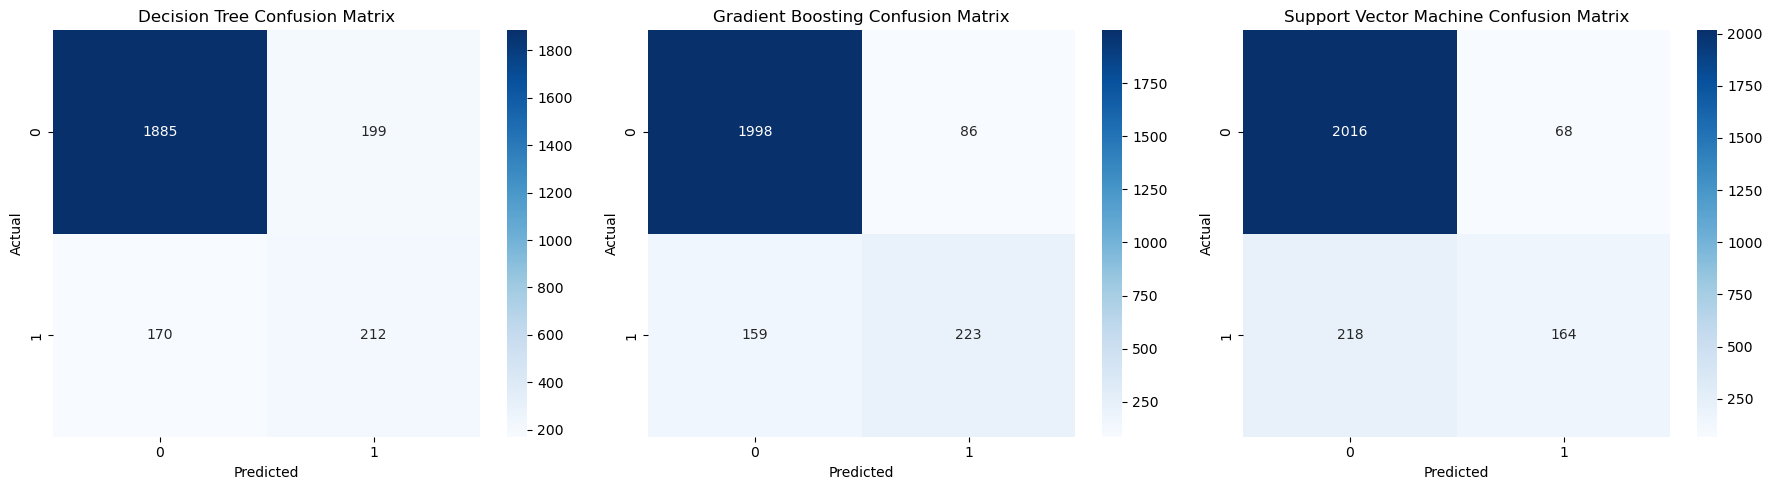

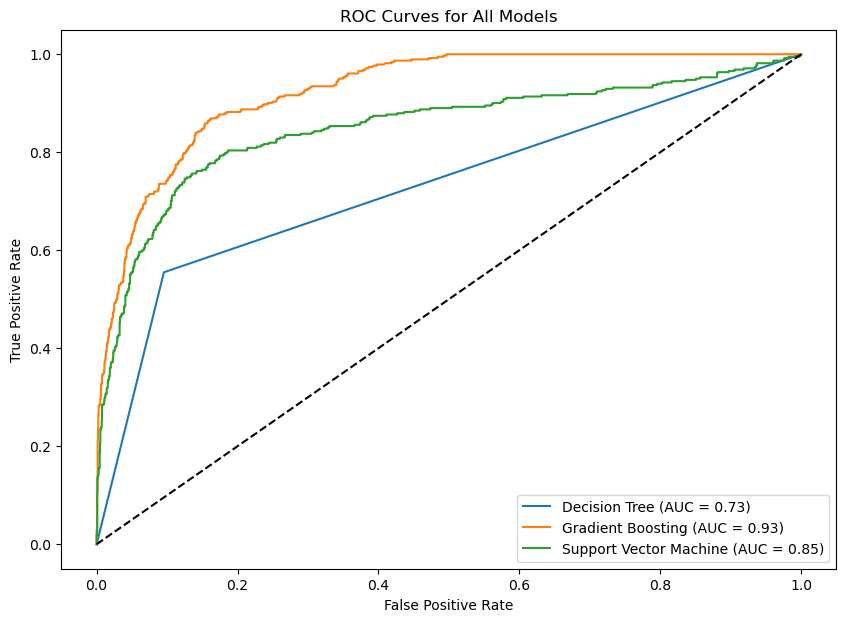

In [20]:
# Initialize models with appropriate hyperparameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

trained_models = {}
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model's performance
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Summarize performance in a table
summary_results = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]
print("\nPerformance Summary:")
print(summary_results)

# Plot confusion matrices for each model
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot ROC curves for all models
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 7))
for name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guesses
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [22]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='roc_auc', verbose=1)
gb_grid.fit(X_train_scaled, y_train)

print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best ROC AUC score for Gradient Boosting:", gb_grid.best_score_)

# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=3, scoring='roc_auc', verbose=1)
svm_grid.fit(X_train_scaled, y_train)

print("Best parameters for SVM:", svm_grid.best_params_)
print("Best ROC AUC score for SVM:", svm_grid.best_score_)

# Retrain models with optimal hyperparameters
best_gb = gb_grid.best_estimator_
best_svm = svm_grid.best_estimator_

best_gb.fit(X_train_scaled, y_train)
best_svm.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC score for Gradient Boosting: 0.9311559062901792
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best ROC AUC score for SVM: 0.8670067852152163


SVC(C=10, kernel='linear', probability=True, random_state=42)


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.76      0.54      0.63       382

    accuracy                           0.90      2466
   macro avg       0.84      0.75      0.79      2466
weighted avg       0.89      0.90      0.89      2466


Top Features from Gradient Boosting:
                    Feature  Importance
8                PageValues    0.712448
10                    Month    0.044582
6               BounceRates    0.044306
18      Total_Pages_Visited    0.042887
7                 ExitRates    0.038902
5   ProductRelated_Duration    0.024653
4            ProductRelated    0.022435
17           Total_Duration    0.016774
0            Administrative    0.012170
1   Administrative_Duration    0.011982


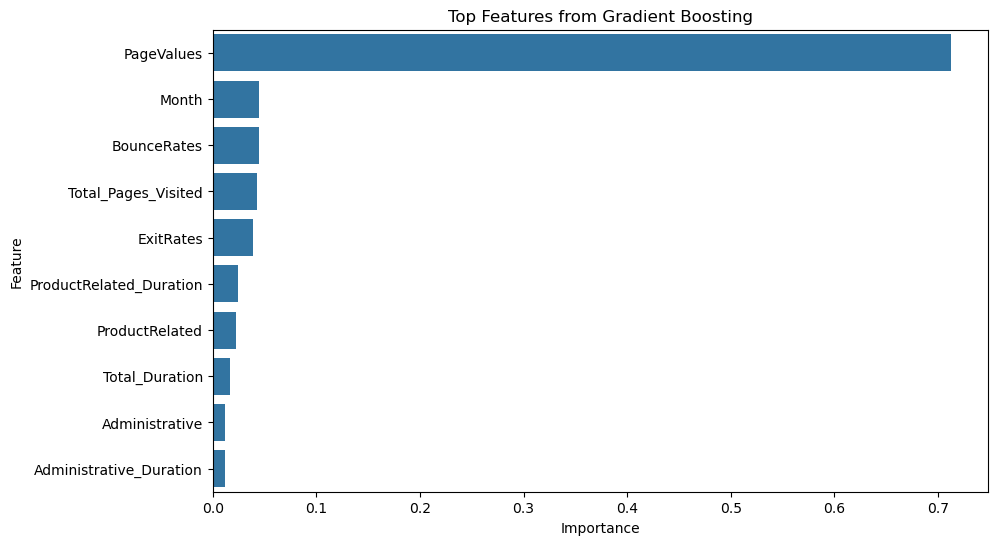


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2084
           1       0.71      0.37      0.49       382

    accuracy                           0.88      2466
   macro avg       0.80      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466


Final ROC AUC Scores:
Gradient Boosting: 0.93
SVM: 0.86

Selected Final Model: Gradient Boosting


In [23]:
# Evaluate the tuned models on the test set
from sklearn.metrics import classification_report

# Gradient Boosting
y_pred_gb = best_gb.predict(X_test_scaled)
y_pred_proba_gb = best_gb.predict_proba(X_test_scaled)[:, 1]
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Feature Importance (Gradient Boosting)
gb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_gb.feature_importances_})
gb_importance = gb_importance.sort_values(by='Importance', ascending=False)
print("\nTop Features from Gradient Boosting:")
print(gb_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance.head(10))
plt.title('Top Features from Gradient Boosting')
plt.show()

# Support Vector Machine
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Compare ROC AUC scores of tuned models
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print(f"\nFinal ROC AUC Scores:\nGradient Boosting: {roc_auc_gb:.2f}\nSVM: {roc_auc_svm:.2f}")

# Select final model (Gradient Boosting if it has higher ROC AUC)
final_model = best_gb if roc_auc_gb > roc_auc_svm else best_svm
final_model_name = "Gradient Boosting" if roc_auc_gb > roc_auc_svm else "SVM"
print(f"\nSelected Final Model: {final_model_name}")


In [24]:
import joblib

# Save the final model
joblib.dump(final_model, 'final_model.pkl')
print("\nFinal model saved as 'final_model.pkl'.")

# Function to preprocess new data and make predictions
def preprocess_and_predict(new_data):
    """
    Preprocess new data and make predictions using the saved model.
    
    Parameters:
        new_data (pd.DataFrame): New data to predict on.
        
    Returns:
        predictions (np.array): Predicted classes.
        probabilities (np.array): Predicted probabilities.
    """
    # Load the saved model
    model = joblib.load('final_model.pkl')
    
    # Preprocess new data (e.g., scaling)
    new_data_scaled = scaler.transform(new_data)
    
    # Make predictions
    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)[:, 1]
    
    return predictions, probabilities

# Example usage of the function with dummy data
dummy_data = X_test.iloc[:5]  # Replace with real new data in practice
predictions, probabilities = preprocess_and_predict(dummy_data)
print("\nPredictions on new data:", predictions)
print("Prediction probabilities:", probabilities)



Final model saved as 'final_model.pkl'.

Predictions on new data: [0 0 1 0 0]
Prediction probabilities: [0.02606938 0.04250736 0.72989685 0.02541762 0.0342418 ]


In [ ]:
#####TEXT DATA REVIEWSSS##########

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download required NLTK data if not already present
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
file_path = "C:\\Users\\hp\\Documents\\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(file_path)

# Display dataset info and check for missing values
print("Dataset Information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None

Missing values:
Review    0
Rating    0
dtype: int64


[nltk_data] Downloading package stopwords to C:\Users\hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase and remove punctuation and digits
    text = re.sub(f"[{string.punctuation}]", "", text.lower())
    text = re.sub(r"\d+", "", text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)





Sentiment Distribution:
Sentiment
Positive    15093
Negative     3214
Neutral      2184
Name: count, dtype: int64


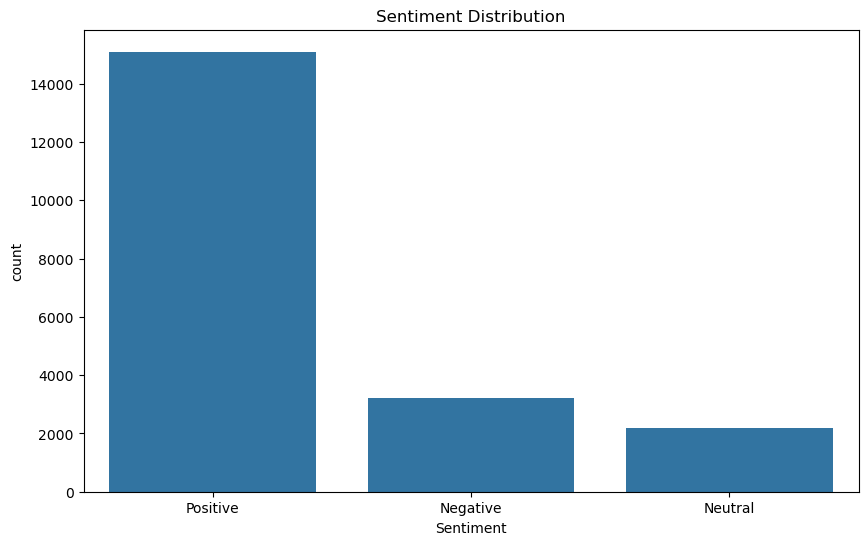

In [42]:
# Label sentiment based on ratings
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    return 'Unknown'

df['Sentiment'] = df['Rating'].apply(label_sentiment)

# Display sentiment distribution and visualize it
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


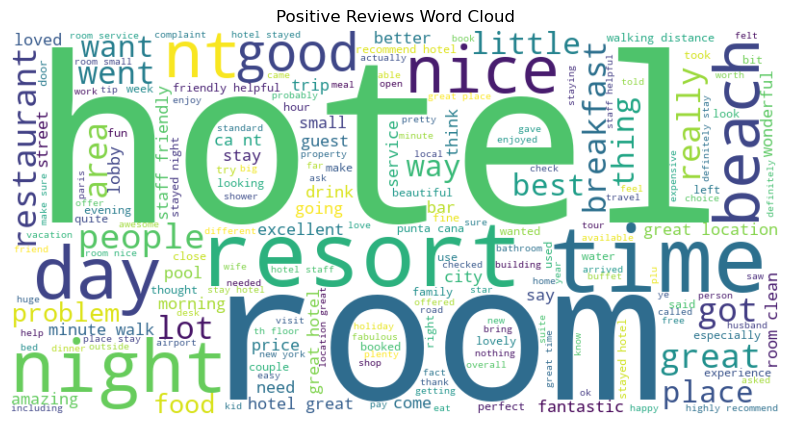

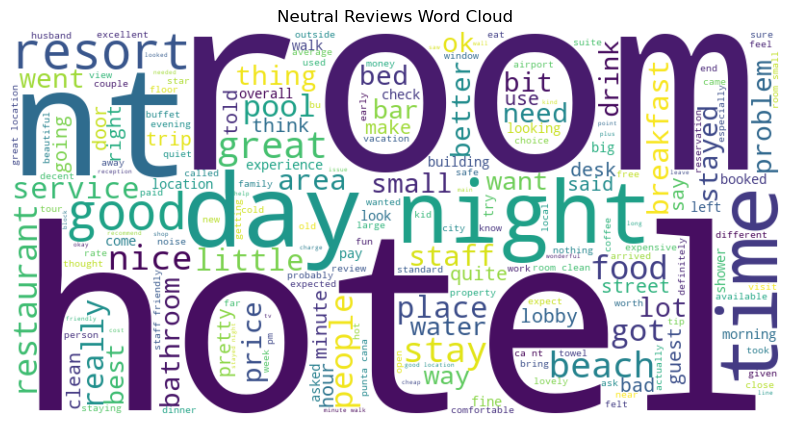

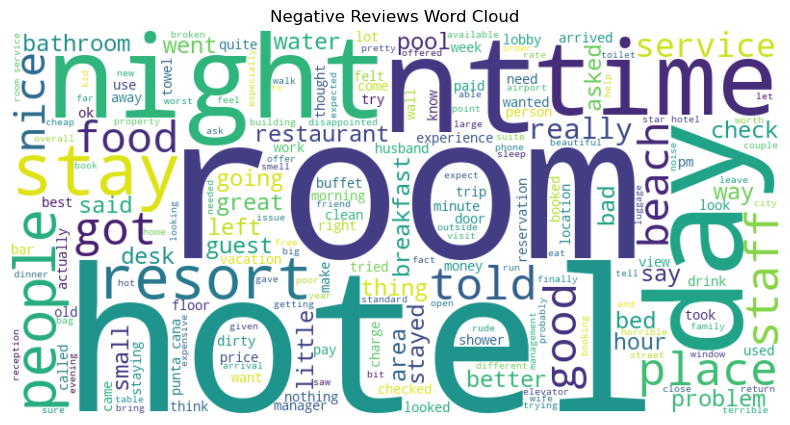

In [44]:
# Create word clouds for each sentiment category
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Processed_Review'])
    create_wordcloud(text, f'{sentiment} Reviews Word Cloud')



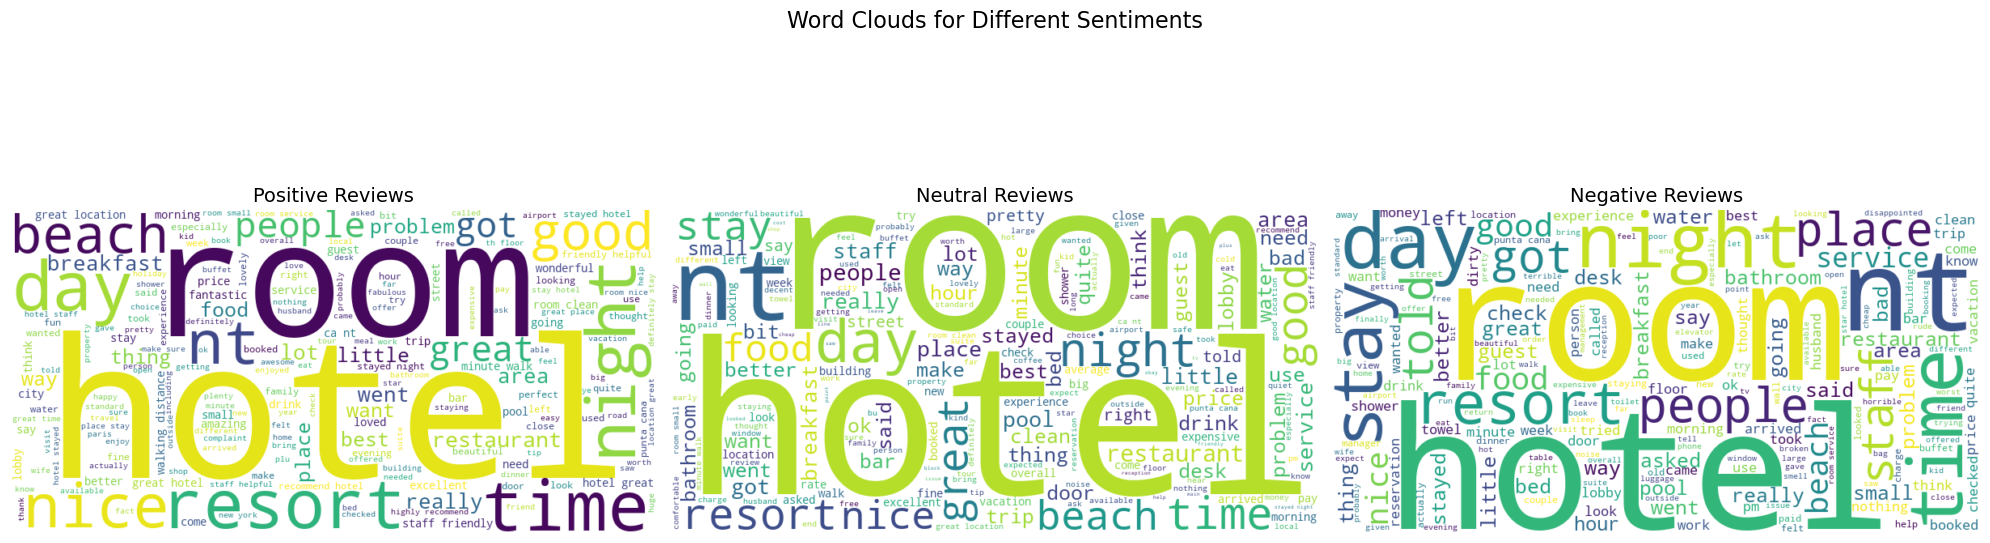

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(text):
    return WordCloud(width=800, height=400, background_color='white').generate(text)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Word Clouds for Different Sentiments', fontsize=16)

for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Processed_Review'])
    wordcloud = create_wordcloud(text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'{sentiment} Reviews', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [46]:
# Split the data into training and testing sets
X = df['Processed_Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF Vectorization with a maximum of 5000 features to prevent overfitting and reduce computation time
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes model and make predictions
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model using various metrics and handle zero division warnings gracefully by setting zero_division=1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics and plot confusion matrix for better understanding of model performance
print("\nNaive Bayes Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")




Naive Bayes Evaluation Metrics:
Accuracy: 0.8182
Precision: 0.7329
Recall: 0.8182
F1 Score: 0.7645


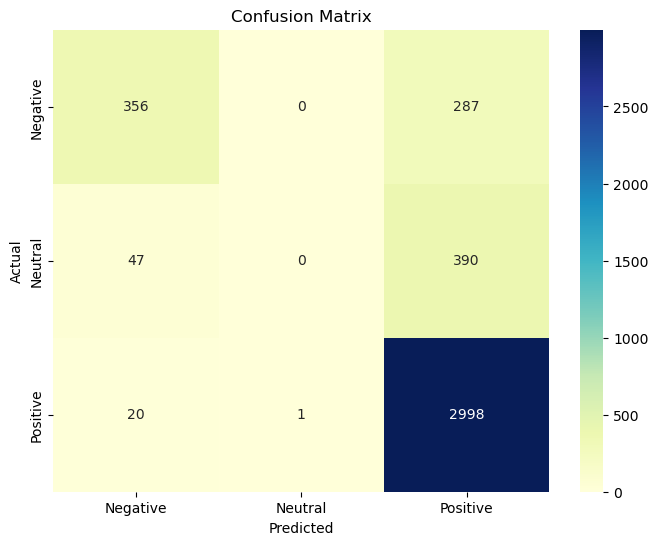


Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.55      0.67       643
     Neutral       0.00      0.00      0.00       437
    Positive       0.82      0.99      0.90      3019

    accuracy                           0.82      4099
   macro avg       0.55      0.52      0.52      4099
weighted avg       0.73      0.82      0.76      4099



In [50]:

# Plot confusion matrix with color map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print detailed classification report for further insights into model performance across different classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [66]:
# Analyze feature importance by examining top features for each sentiment class based on log probabilities from Naive Bayes model
feature_importance = nb_classifier.feature_log_prob_
feature_names = tfidf_vectorizer.get_feature_names_out()

for i, sentiment in enumerate(nb_classifier.classes_):
    top_features_idx = feature_importance[i].argsort()[-20:][::-1]
    top_features_names = [feature_names[idx] for idx in top_features_idx]
    top_features_values = feature_importance[i][top_features_idx]
    
    print(f"\nTop 20 features for {sentiment} sentiment:")
    for name, value in zip(top_features_names, top_features_values):
        print(f"{name}: {value:.4f}")
    




Top 20 features for Negative sentiment:
room: -4.8465
hotel: -4.8993
nt: -5.3046
night: -5.6762
stay: -5.7146
day: -5.7225
service: -5.8237
time: -5.8634
told: -5.8854
resort: -5.9233
like: -5.9585
good: -5.9775
bed: -5.9777
staff: -5.9787
place: -6.0109
desk: -6.0282
food: -6.0708
got: -6.0764
star: -6.0897
bad: -6.1092

Top 20 features for Neutral sentiment:
hotel: -4.9126
room: -4.9424
good: -5.3852
nt: -5.4524
nice: -5.6192
location: -5.6452
night: -5.7321
great: -5.7859
clean: -5.9019
ok: -5.9046
small: -5.9122
stay: -5.9509
beach: -5.9675
staff: -5.9765
time: -6.0060
day: -6.0301
stayed: -6.0395
breakfast: -6.0518
resort: -6.0616
like: -6.0623

Top 20 features for Positive sentiment:
hotel: -4.4936
room: -4.8496
great: -4.9468
staff: -5.3366
good: -5.3412
stay: -5.3533
location: -5.3697
nt: -5.4643
nice: -5.4866
night: -5.5972
clean: -5.6132
stayed: -5.6185
breakfast: -5.6367
excellent: -5.6765
time: -5.6896
place: -5.7403
service: -5.7414
friendly: -5.7567
day: -5.7585
restaura

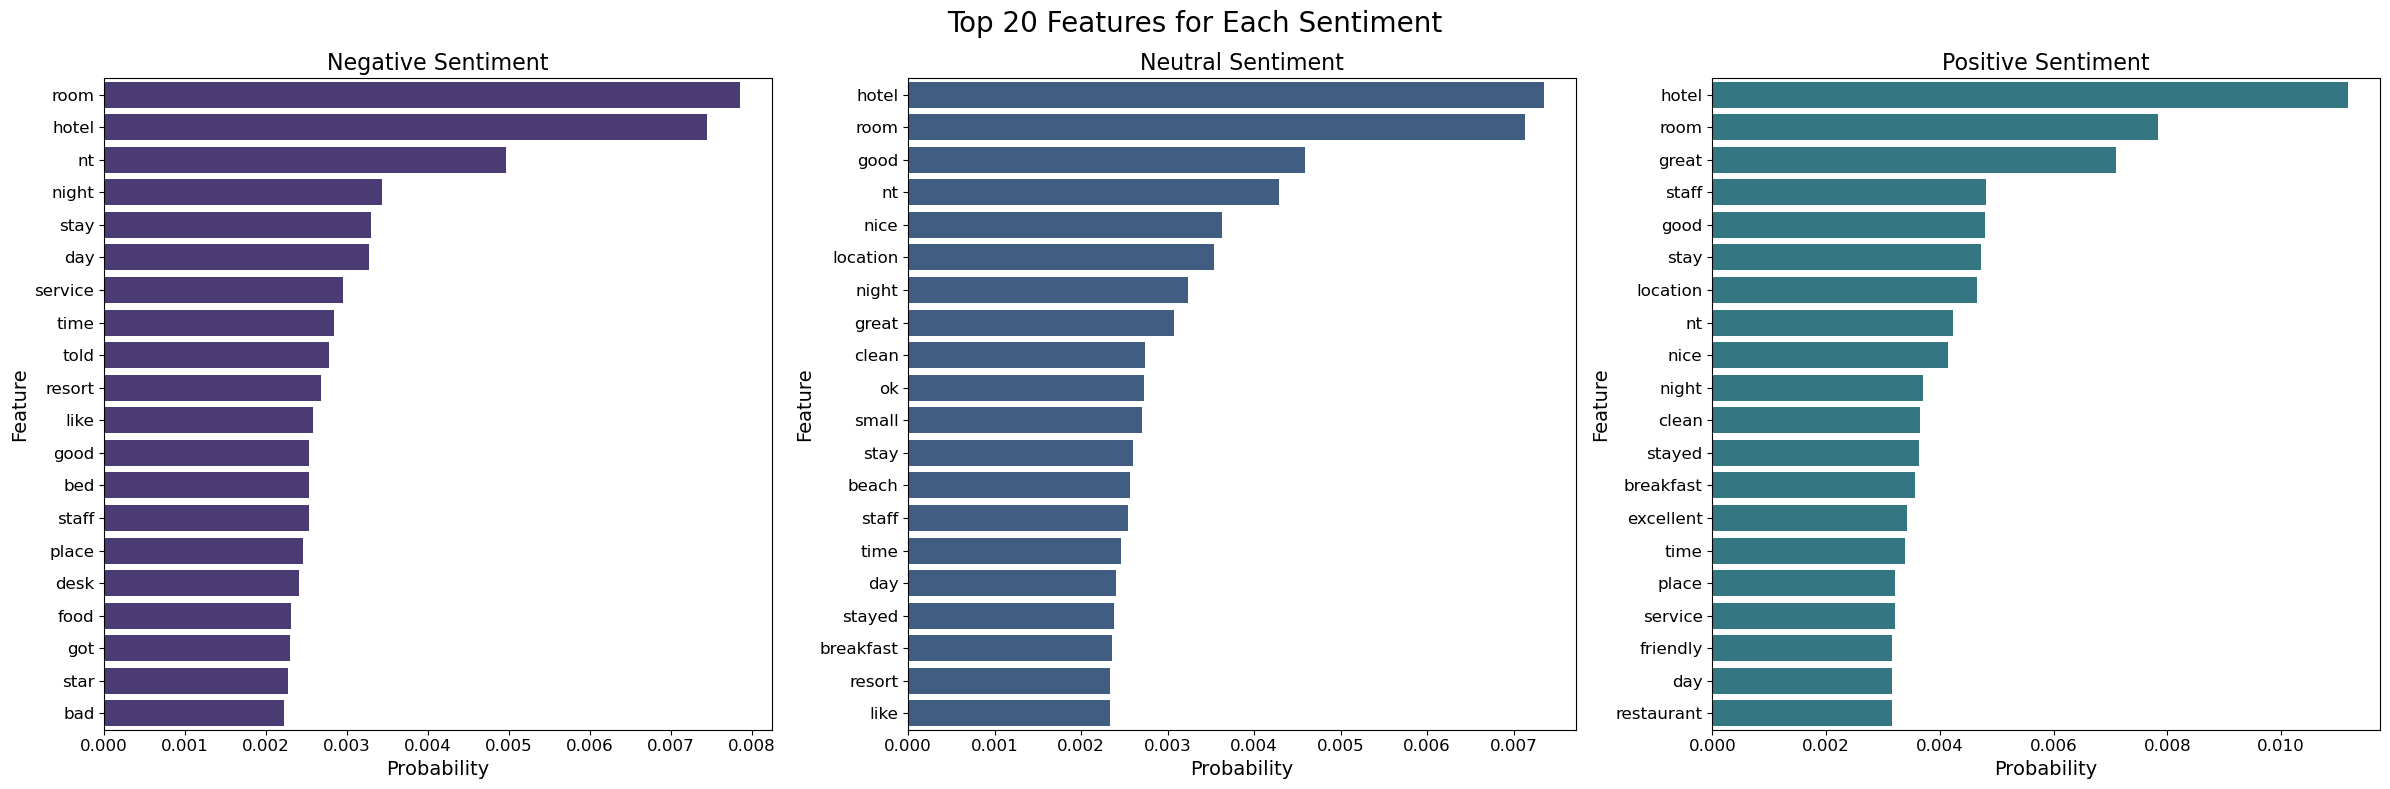

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyze feature importance
feature_importance = nb_classifier.feature_log_prob_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a single figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Top 20 Features for Each Sentiment', fontsize=20)

for i, sentiment in enumerate(nb_classifier.classes_):
    top_features_idx = feature_importance[i].argsort()[-20:][::-1]
    top_features_names = [feature_names[idx] for idx in top_features_idx]
    top_features_values = np.exp(feature_importance[i][top_features_idx])  # Convert log probabilities to probabilities
    
    # Plot in the corresponding subplot
    sns.barplot(x=top_features_values, y=top_features_names, ax=axes[i], color=sns.color_palette("viridis")[i])
    axes[i].set_title(f'{sentiment} Sentiment', fontsize=16)
    axes[i].set_xlabel('Probability', fontsize=14)
    axes[i].set_ylabel('Feature', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()



In [76]:
####CHURN DATA###

In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("C:\\Users\\hp\\Documents\\Telco_Customer_Churn_Dataset.csv")

# Data Preparation
# Remove 'customerID' column and convert 'TotalCharges' to numeric
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges' by filling with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split data into features and target variable
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R^2): {r2:.4f}')

# Feature Importance Analysis (optional)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

Mean Squared Error (MSE): 0.1341
Mean Absolute Error (MAE): 0.2910
Root Mean Squared Error (RMSE): 0.3662
R-squared (R^2): 0.3111
                                       Coefficient
InternetService_Fiber optic               0.280851
StreamingMovies_Yes                       0.106830
StreamingTV_Yes                           0.088090
MultipleLines_Yes                         0.071455
PaymentMethod_Electronic check            0.070541
PaperlessBilling_Yes                      0.045448
SeniorCitizen                             0.037829
PhoneService_Yes                          0.026271
DeviceProtection_Yes                      0.021808
Partner_Yes                               0.007199
TotalCharges                             -0.000042
OnlineBackup_Yes                         -0.000825
tenure                                   -0.001940
PaymentMethod_Mailed check               -0.003792
MonthlyCharges                           -0.004426
PaymentMethod_Credit card (automatic)    -0.004455
gen

In [94]:


# Data Preparation
# Check if 'customerID' column exists before dropping
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges' by filling with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split data into features and target variable
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Train-test split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R^2): {r2:.4f}')

# Deployment and Knowledge Extraction: Analyze coefficients to identify most influential features
coefficients_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values('Abs_Coefficient', ascending=False)

print("\nMost Influential Features:")
print(coefficients_df.head(10))

Mean Squared Error (MSE): 0.1341
Mean Absolute Error (MAE): 0.2910
Root Mean Squared Error (RMSE): 0.3662
R-squared (R^2): 0.3111

Most Influential Features:
                                  Coefficient  Abs_Coefficient
InternetService_Fiber optic          0.280851         0.280851
Contract_One year                   -0.106990         0.106990
StreamingMovies_Yes                  0.106830         0.106830
StreamingTV_Yes                      0.088090         0.088090
Contract_Two year                   -0.080183         0.080183
MultipleLines_Yes                    0.071455         0.071455
PaymentMethod_Electronic check       0.070541         0.070541
PaperlessBilling_Yes                 0.045448         0.045448
SeniorCitizen                        0.037829         0.037829
OnlineBackup_No internet service    -0.036310         0.036310


In [98]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Data Preparation
# Remove 'customerID' column if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges' by filling with mean
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

# One-hot encode categorical variables, excluding target 'Churn'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Target variable mapping
df_encoded['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Split data into features and target variable
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train-test split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Model Evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f'Mean Squared Error (MSE): {mse_linear:.4f}')
print(f'Mean Absolute Error (MAE): {mae_linear:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear:.4f}')
print(f'R-squared (R^2): {r2_linear:.4f}')

# Explore Non-linear Models: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation for Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Classifier Performance:")
print(f'Accuracy: {accuracy_rf:.4f}')

# Cross-validation for Random Forest Classifier
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-validated Accuracy: {np.mean(cv_scores_rf):.4f} ± {np.std(cv_scores_rf):.4f}')

# Feature Importance Analysis using Random Forest
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
print("\nTop 10 Most Influential Features from Random Forest:")
print(feature_importances.head(10))

C:\Users\hp\AppData\Local\Temp\ipykernel_27988\984432628.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_total_charges, inplace=True)


Linear Regression Performance:
Mean Squared Error (MSE): 0.1341
Mean Absolute Error (MAE): 0.2910
Root Mean Squared Error (RMSE): 0.3662
R-squared (R^2): 0.3111

Random Forest Classifier Performance:
Accuracy: 0.7921
Cross-validated Accuracy: 0.7909 ± 0.0107

Top 10 Most Influential Features from Random Forest:
                                Importance
TotalCharges                      0.190070
tenure                            0.175139
MonthlyCharges                    0.172152
InternetService_Fiber optic       0.036002
PaymentMethod_Electronic check    0.035156
Contract_Two year                 0.030504
OnlineSecurity_Yes                0.029633
gender_Male                       0.027534
PaperlessBilling_Yes              0.025265
Partner_Yes                       0.024054


C:\Users\hp\AppData\Local\Temp\ipykernel_27988\3992201602.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Pastel1')


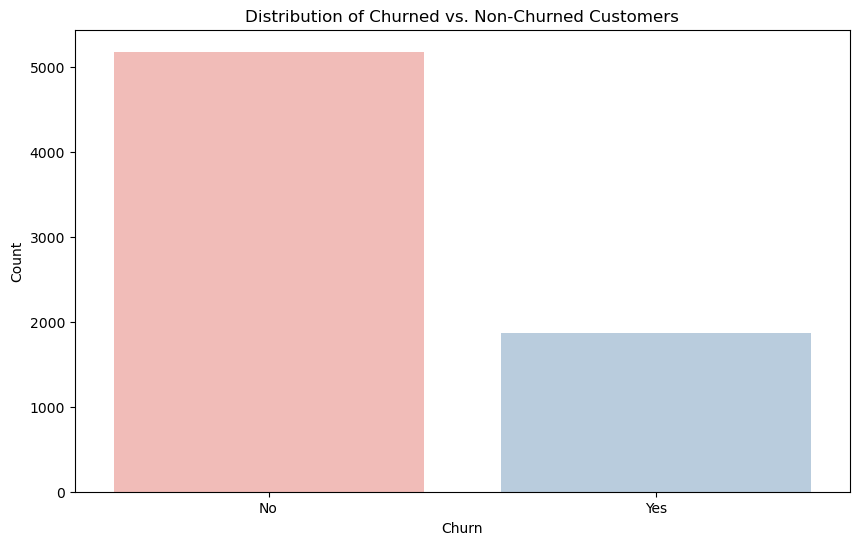

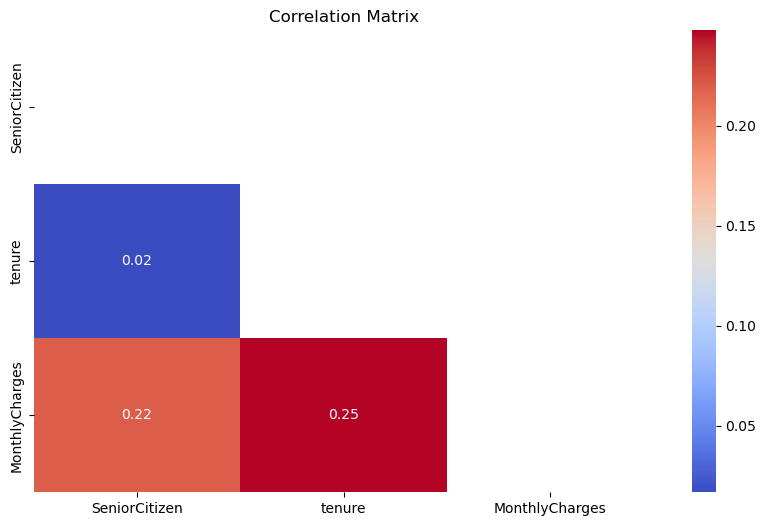

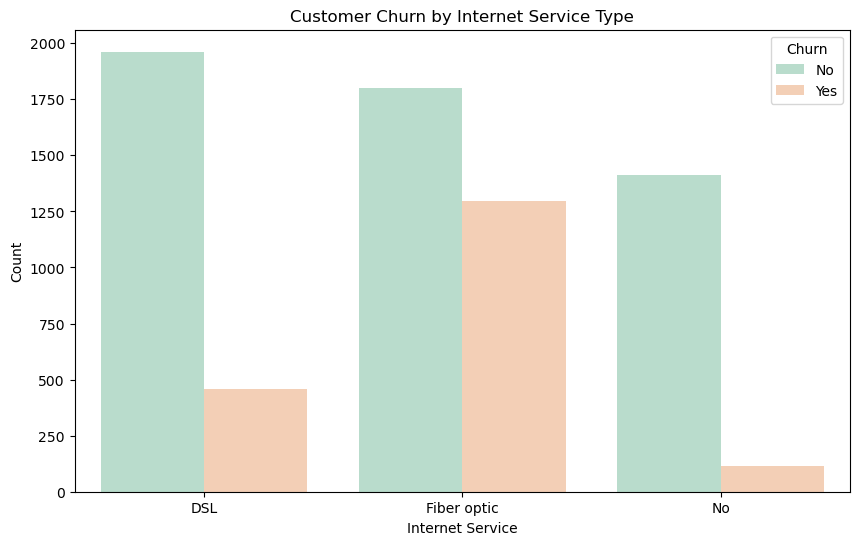

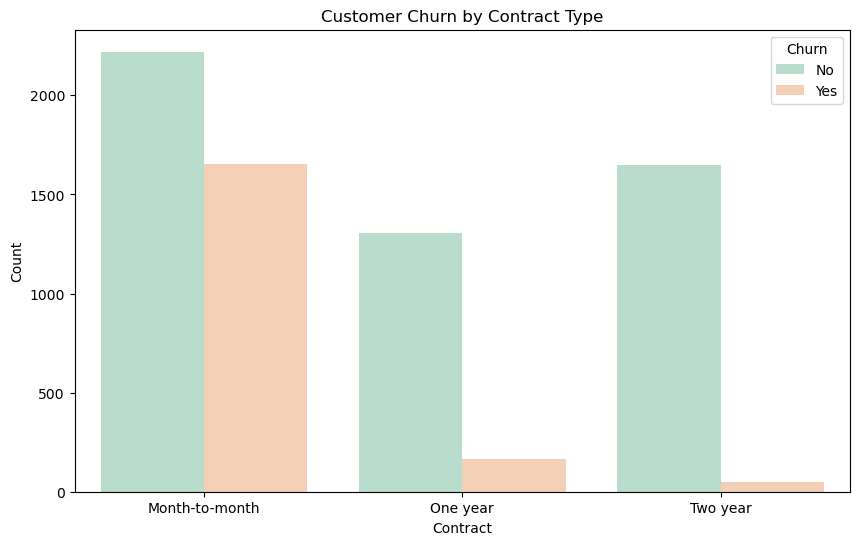

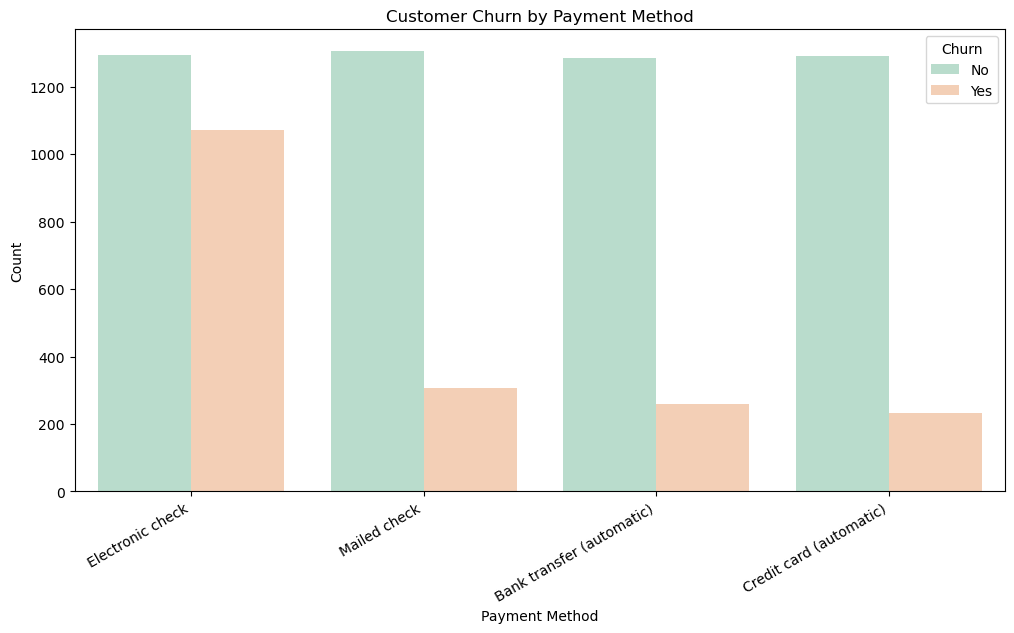

In [102]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Visualize the distribution of churned vs. non-churned customers
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', palette='Pastel1')
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Visualize the correlation matrix for numerical features
plt.figure(figsize=(10, 6))
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(corr))
plt.title('Correlation Matrix')
plt.show()

# Bar plot: Customer Churn by Internet Service Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Pastel2')
plt.title('Customer Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

# Bar plot: Customer Churn by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Pastel2')
plt.title('Customer Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

# Bar plot: Customer Churn by Payment Method
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Pastel2')
plt.title('Customer Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.show()
